<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [19]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  81.014659  1236.741277  0.270313  5.890265  1.263785
1  15.944002  1406.753286  0.017748  1.614145  1.076735
2  15.803575  1199.481939  0.464741  9.223780  1.507614
3  53.237518  1630.512667  0.387106  8.852040  1.549158
4  61.230503   947.898027  0.977838  8.173675  1.493114


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0419402	total: 158ms	remaining: 2m 37s
1:	learn: 1.0295874	total: 158ms	remaining: 1m 19s
2:	learn: 1.0184443	total: 159ms	remaining: 52.8s
3:	learn: 1.0051719	total: 159ms	remaining: 39.7s
4:	learn: 0.9881695	total: 160ms	remaining: 31.9s
5:	learn: 0.9755095	total: 161ms	remaining: 26.6s
6:	learn: 0.9604321	total: 161ms	remaining: 22.9s
7:	learn: 0.9459815	total: 162ms	remaining: 20.1s
8:	learn: 0.9348829	total: 163ms	remaining: 17.9s
9:	learn: 0.9237094	total: 163ms	remaining: 16.2s
10:	learn: 0.9141703	total: 164ms	remaining: 14.7s
11:	learn: 0.9030261	total: 165ms	remaining: 13.5s
12:	learn: 0.8910169	total: 165ms	remaining: 12.5s
13:	learn: 0.8785213	total: 166ms	remaining: 11.7s
14:	learn: 0.8690069	total: 166ms	remaining: 10.9s
15:	learn: 0.8588853	total: 167ms	remaining: 10.3s
16:	learn: 0.8490106	total: 168ms	remaining: 9.69s
17:	learn: 0.8382003	total: 168ms	remaining: 9.18s
18:	learn: 0.8279038	total: 169ms	remaining: 8.72s
19:	learn: 0.8177299	total: 170ms	remai

25:	learn: 0.7620627	total: 174ms	remaining: 6.5s
26:	learn: 0.7544101	total: 174ms	remaining: 6.28s
27:	learn: 0.7450926	total: 175ms	remaining: 6.06s
28:	learn: 0.7327286	total: 175ms	remaining: 5.87s
29:	learn: 0.7239145	total: 176ms	remaining: 5.68s
30:	learn: 0.7158537	total: 176ms	remaining: 5.52s
31:	learn: 0.7065064	total: 177ms	remaining: 5.36s
32:	learn: 0.7004911	total: 178ms	remaining: 5.21s
33:	learn: 0.6932264	total: 178ms	remaining: 5.07s
34:	learn: 0.6860920	total: 179ms	remaining: 4.93s
35:	learn: 0.6772957	total: 179ms	remaining: 4.8s
36:	learn: 0.6703838	total: 180ms	remaining: 4.69s
37:	learn: 0.6639655	total: 181ms	remaining: 4.57s
38:	learn: 0.6568538	total: 181ms	remaining: 4.46s
39:	learn: 0.6489866	total: 182ms	remaining: 4.36s
40:	learn: 0.6409509	total: 182ms	remaining: 4.26s
41:	learn: 0.6344353	total: 183ms	remaining: 4.17s
42:	learn: 0.6274448	total: 183ms	remaining: 4.08s
43:	learn: 0.6215466	total: 184ms	remaining: 4s
44:	learn: 0.6144556	total: 185ms	re

123:	learn: 0.3159593	total: 260ms	remaining: 1.84s
124:	learn: 0.3136103	total: 261ms	remaining: 1.82s
125:	learn: 0.3118024	total: 261ms	remaining: 1.81s
126:	learn: 0.3092706	total: 261ms	remaining: 1.8s
127:	learn: 0.3071706	total: 262ms	remaining: 1.78s
128:	learn: 0.3050026	total: 263ms	remaining: 1.78s
129:	learn: 0.3034340	total: 264ms	remaining: 1.76s
130:	learn: 0.3014574	total: 264ms	remaining: 1.75s
131:	learn: 0.2987572	total: 265ms	remaining: 1.74s
132:	learn: 0.2970225	total: 265ms	remaining: 1.73s
133:	learn: 0.2949855	total: 266ms	remaining: 1.72s
134:	learn: 0.2929794	total: 266ms	remaining: 1.71s
135:	learn: 0.2918529	total: 267ms	remaining: 1.69s
136:	learn: 0.2898335	total: 267ms	remaining: 1.68s
137:	learn: 0.2885026	total: 268ms	remaining: 1.67s
138:	learn: 0.2869308	total: 268ms	remaining: 1.66s
139:	learn: 0.2855917	total: 269ms	remaining: 1.65s
140:	learn: 0.2841185	total: 269ms	remaining: 1.64s
141:	learn: 0.2820765	total: 270ms	remaining: 1.63s
142:	learn: 0

177:	learn: 0.2303976	total: 289ms	remaining: 1.33s
178:	learn: 0.2293596	total: 291ms	remaining: 1.33s
179:	learn: 0.2279766	total: 291ms	remaining: 1.33s
180:	learn: 0.2266762	total: 292ms	remaining: 1.32s
181:	learn: 0.2256870	total: 292ms	remaining: 1.31s
182:	learn: 0.2246105	total: 293ms	remaining: 1.31s
183:	learn: 0.2237874	total: 294ms	remaining: 1.3s
184:	learn: 0.2227398	total: 294ms	remaining: 1.3s
185:	learn: 0.2215959	total: 295ms	remaining: 1.29s
186:	learn: 0.2202144	total: 296ms	remaining: 1.28s
187:	learn: 0.2193376	total: 296ms	remaining: 1.28s
188:	learn: 0.2181824	total: 297ms	remaining: 1.27s
189:	learn: 0.2170196	total: 297ms	remaining: 1.27s
190:	learn: 0.2160194	total: 298ms	remaining: 1.26s
191:	learn: 0.2148156	total: 298ms	remaining: 1.25s
192:	learn: 0.2136427	total: 299ms	remaining: 1.25s
193:	learn: 0.2129389	total: 300ms	remaining: 1.24s
194:	learn: 0.2119966	total: 301ms	remaining: 1.24s
195:	learn: 0.2109932	total: 302ms	remaining: 1.24s
196:	learn: 0.

461:	learn: 0.0906973	total: 420ms	remaining: 489ms
462:	learn: 0.0904717	total: 421ms	remaining: 488ms
463:	learn: 0.0902734	total: 421ms	remaining: 487ms
464:	learn: 0.0899836	total: 422ms	remaining: 485ms
465:	learn: 0.0897681	total: 422ms	remaining: 484ms
466:	learn: 0.0894370	total: 423ms	remaining: 482ms
467:	learn: 0.0893189	total: 423ms	remaining: 481ms
468:	learn: 0.0890390	total: 423ms	remaining: 479ms
469:	learn: 0.0888297	total: 424ms	remaining: 478ms
470:	learn: 0.0885595	total: 424ms	remaining: 476ms
471:	learn: 0.0884607	total: 424ms	remaining: 475ms
472:	learn: 0.0883640	total: 425ms	remaining: 473ms
473:	learn: 0.0881029	total: 425ms	remaining: 472ms
474:	learn: 0.0877962	total: 425ms	remaining: 470ms
475:	learn: 0.0877176	total: 426ms	remaining: 469ms
476:	learn: 0.0876405	total: 426ms	remaining: 467ms
477:	learn: 0.0873180	total: 427ms	remaining: 466ms
478:	learn: 0.0872421	total: 427ms	remaining: 465ms
479:	learn: 0.0870911	total: 428ms	remaining: 463ms
480:	learn: 

529:	learn: 0.0784301	total: 448ms	remaining: 397ms
530:	learn: 0.0779638	total: 448ms	remaining: 396ms
531:	learn: 0.0779086	total: 449ms	remaining: 395ms
532:	learn: 0.0778543	total: 449ms	remaining: 394ms
533:	learn: 0.0773992	total: 450ms	remaining: 392ms
534:	learn: 0.0773041	total: 450ms	remaining: 391ms
535:	learn: 0.0772113	total: 450ms	remaining: 390ms
536:	learn: 0.0771209	total: 451ms	remaining: 389ms
537:	learn: 0.0770812	total: 451ms	remaining: 387ms
538:	learn: 0.0768627	total: 452ms	remaining: 386ms
539:	learn: 0.0766744	total: 452ms	remaining: 385ms
540:	learn: 0.0765228	total: 452ms	remaining: 384ms
541:	learn: 0.0764729	total: 453ms	remaining: 383ms
542:	learn: 0.0760927	total: 453ms	remaining: 381ms
543:	learn: 0.0759122	total: 454ms	remaining: 380ms
544:	learn: 0.0757364	total: 454ms	remaining: 379ms
545:	learn: 0.0755652	total: 455ms	remaining: 378ms
546:	learn: 0.0752938	total: 455ms	remaining: 377ms
547:	learn: 0.0751008	total: 455ms	remaining: 376ms
548:	learn: 

845:	learn: 0.0426446	total: 579ms	remaining: 105ms
846:	learn: 0.0424922	total: 579ms	remaining: 105ms
847:	learn: 0.0424318	total: 580ms	remaining: 104ms
848:	learn: 0.0423792	total: 580ms	remaining: 103ms
849:	learn: 0.0421181	total: 581ms	remaining: 102ms
850:	learn: 0.0420587	total: 581ms	remaining: 102ms
851:	learn: 0.0419943	total: 581ms	remaining: 101ms
852:	learn: 0.0418459	total: 582ms	remaining: 100ms
853:	learn: 0.0417943	total: 582ms	remaining: 99.5ms
854:	learn: 0.0415400	total: 582ms	remaining: 98.8ms
855:	learn: 0.0414815	total: 583ms	remaining: 98ms
856:	learn: 0.0414456	total: 583ms	remaining: 97.3ms
857:	learn: 0.0413883	total: 583ms	remaining: 96.5ms
858:	learn: 0.0411153	total: 584ms	remaining: 95.8ms
859:	learn: 0.0410524	total: 584ms	remaining: 95.1ms
860:	learn: 0.0408036	total: 584ms	remaining: 94.3ms
861:	learn: 0.0406359	total: 585ms	remaining: 93.6ms
862:	learn: 0.0403952	total: 585ms	remaining: 92.9ms
863:	learn: 0.0403093	total: 585ms	remaining: 92.2ms
864

898:	learn: 0.0369123	total: 603ms	remaining: 67.7ms
899:	learn: 0.0368963	total: 604ms	remaining: 67.1ms
900:	learn: 0.0368807	total: 604ms	remaining: 66.4ms
901:	learn: 0.0366725	total: 605ms	remaining: 65.7ms
902:	learn: 0.0366490	total: 605ms	remaining: 65ms
903:	learn: 0.0365597	total: 606ms	remaining: 64.3ms
904:	learn: 0.0363559	total: 606ms	remaining: 63.6ms
905:	learn: 0.0363325	total: 607ms	remaining: 62.9ms
906:	learn: 0.0361818	total: 607ms	remaining: 62.2ms
907:	learn: 0.0360654	total: 607ms	remaining: 61.5ms
908:	learn: 0.0360215	total: 607ms	remaining: 60.8ms
909:	learn: 0.0358754	total: 608ms	remaining: 60.1ms
910:	learn: 0.0358126	total: 608ms	remaining: 59.4ms
911:	learn: 0.0357694	total: 609ms	remaining: 58.7ms
912:	learn: 0.0356269	total: 609ms	remaining: 58ms
913:	learn: 0.0354850	total: 609ms	remaining: 57.3ms
914:	learn: 0.0354426	total: 610ms	remaining: 56.6ms
915:	learn: 0.0353040	total: 610ms	remaining: 56ms
916:	learn: 0.0352251	total: 611ms	remaining: 55.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3572050170475396


ABC Pre-generator MAE 1.5327151881468015


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

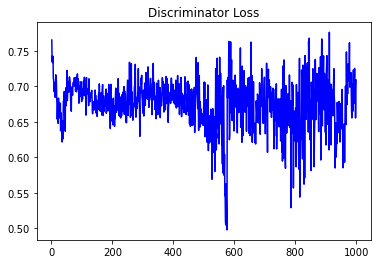

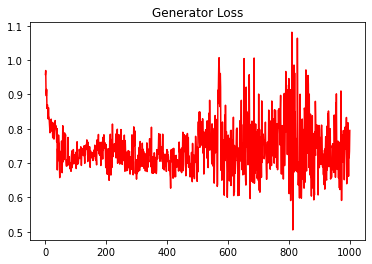

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4967653168439865


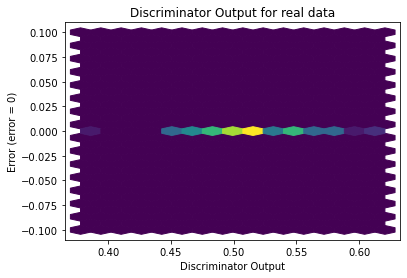

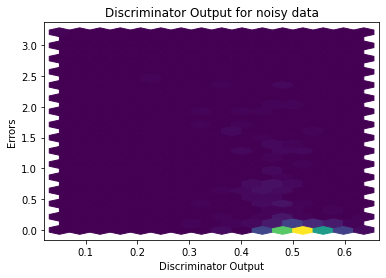

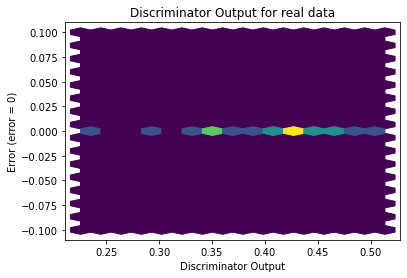

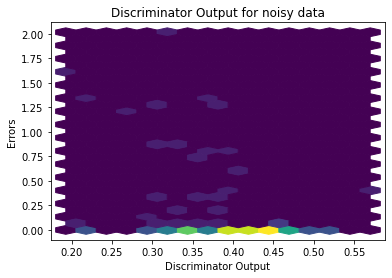

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

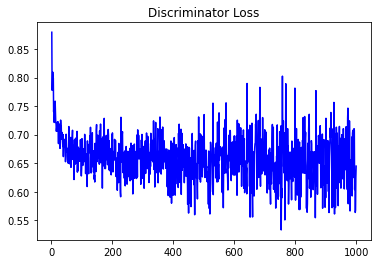

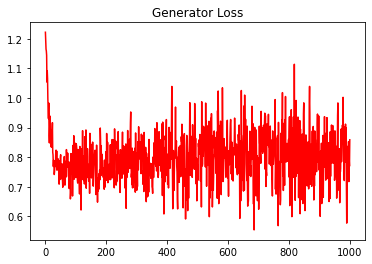

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.028055556109175


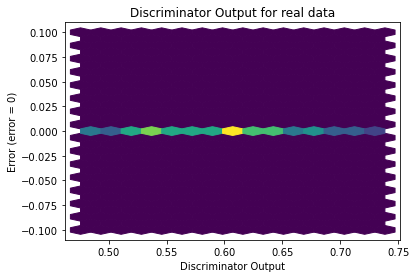

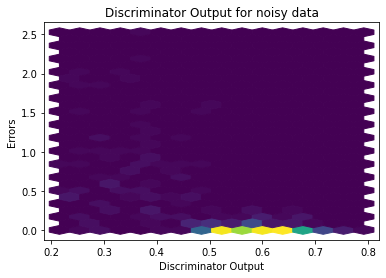

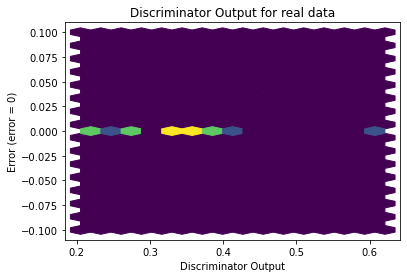

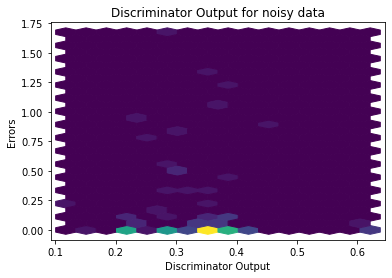

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabNet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


AttributeError: module 'network' has no attribute 'DiscriminatorTabNet'

In [ ]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


In [ ]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())